# Julia Sets Report
## Andrew Bahsoun
### PHYS 220 Final

## Report

### Approach:
I started by watching a couple videos on the Julia sets. I attached them in my sources in the bottom. It helped me gain a lot of insight into how I would be coding the actual thing in python. It was also interesting to see how much it related to the mandelbrot set.   

The iteration function was pretty easy. The equation is simple, but figuring out how to iterate it was somewhat challening. Watching another video and reading the wikipedia article helped me out a lot.    

Finaling, plotting the fractal was easy, I have had practice with matplotlib in the past. 

### Steps:
Define the grid: Create a grid of complex numbers representing points in the complex plane.   
Iterate the function: Apply the function iteratively to each point in the grid.   
Determine membership: Check if the points remain bounded within a certain radius (commonly 2) after a set number of iterations.

### Main takeways
As I mentioned, looking at the similarties of the Julia Set and the Mandelbrot set was super interesting. But also changing c was fun to do as well. There was really no way to predict what it will do when you change c; it is very chaotic. 

### What I would change
I would learn more about the iteration portion of the julia set first to help save me time with trying to learn it and re understand everything in the future. Maybe I would add a part in my presentationi comparing the Mandelbrot and Julia set together. I think that would be interesting. 

# Background on the julia sets

- Gaston Julia: Julia Sets are named after the French mathematician Gaston Julia, who studied the iterative properties of complex functions in the early 20th century.
- Julia was particularly interested in the behavior of complex functions under iteration, specifically the function 
$\ f_c(z) = z^2 + c \$

## Complex plane
- Julia Sets are subsets of the complex plane.
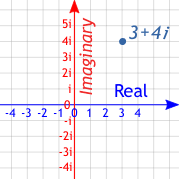
- The equation \$ f_c(z) = z^2 + c \$ is in the format \$ f_c(z) = a + bi \$

### The modules I will use:

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
# try varied iterations and try varied a and bi numbers (c)

#NumPy: For numerical operations and creating arrays.
#Matplotlib: For plotting the Julia Sets and creating animations.
#IPython.display: For displaying animations in Jupyter Notebooks.

### Generating the Julia set through iterations

In [102]:
# Function to generate Julia set
def julia_set(width, height, x_min=-2, x_max=2, y_min=-2, y_max=2, c=-0.4 + 0.6j, max_iter=1000):
    x = np.linspace(x_min, x_max, width)
    y = np.linspace(y_min, y_max, height)
    X, Y = np.meshgrid(x, y) #creates the plane
    Z = X + 1j * Y
    iteration = np.zeros(Z.shape, dtype=int)

    for i in range(max_iter):
        mask = np.abs(Z) < 2 #If the magnitude exceeds 2, the point is considered to have "escaped" to infinity.
        Z[mask] = Z[mask] ** 2 + c  #core iteration f_c(z) = z^2 + c
        iteration[mask] = i

    iteration[iteration == max_iter - 1] = 0  # Reset max iteration values to 0 for better coloring 
    return iteration

### Grid Creation: np.linspace generates linearly spaced values, and np.meshgrid creates a 2D grid of complex numbers.   
### Iteration: For each point in the grid, the function $\ f_c(z) = z^2 + c \$ is applied iteratively. The mask ensures we only update values where the magnitude is less than 2.   
### Coloring: Points that reached the maximum number of iterations are reset for better visualization.

In [137]:
# Parameters for the Julia set plot
width, height = 3000, 3000 # Adjustable resolution
x_min, x_max = -2, 2  # Configurable bounds for the graph
y_min, y_max = -2, 2
max_iter = 1000  # Maximum iterations

In [138]:
# Define the complex constant 'c' manually
c = -0.40 + 0.6j  # Adjust this value as needed

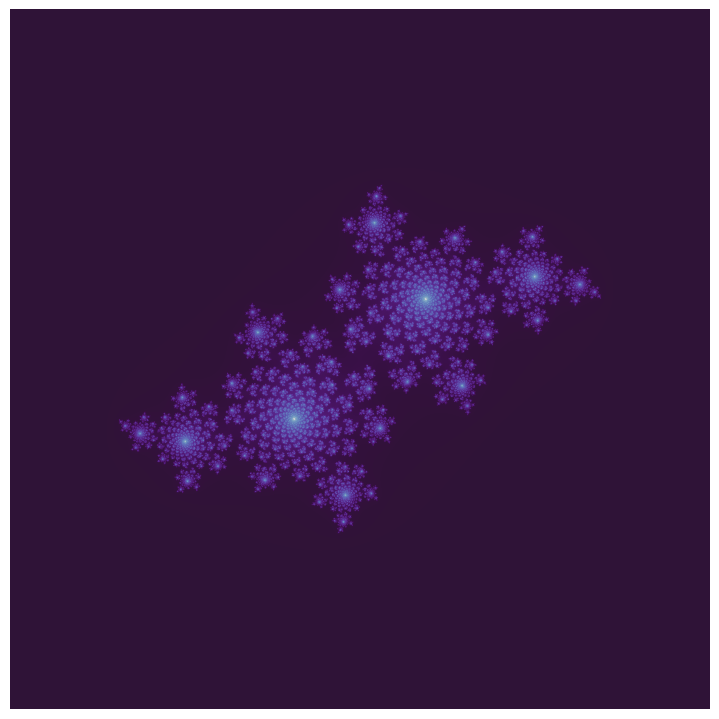

In [139]:
# Generate and plot the Julia set
julia = julia_set(width, height, x_min, x_max, y_min, y_max, c, max_iter)
fig, ax = plt.subplots(figsize=(7, 7), frameon=False)
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
ax.imshow(julia, extent=[x_min, x_max, y_min, y_max], cmap='twilight_shifted', aspect='auto')
ax.axis('off')
plt.show()

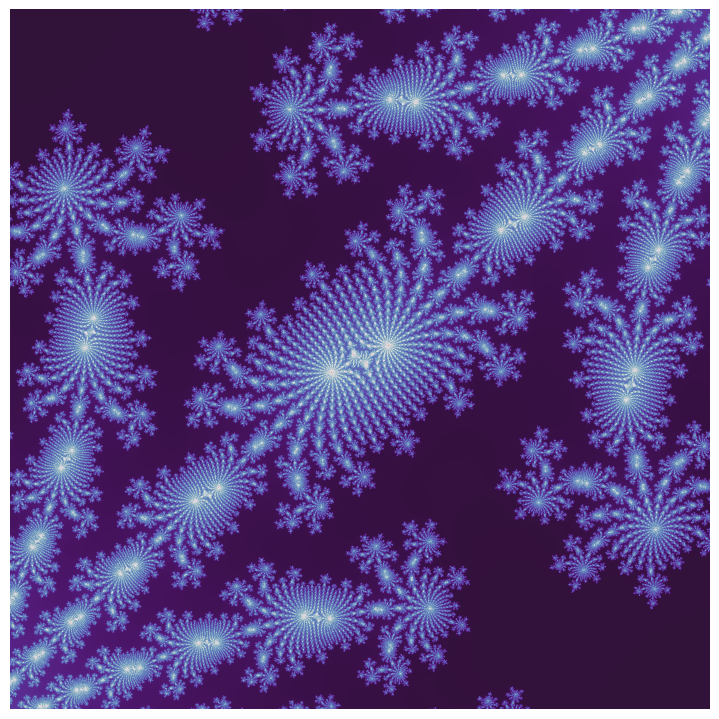

# What happens when we change c? 

## \$ c = -0.39 + 0.6j \$
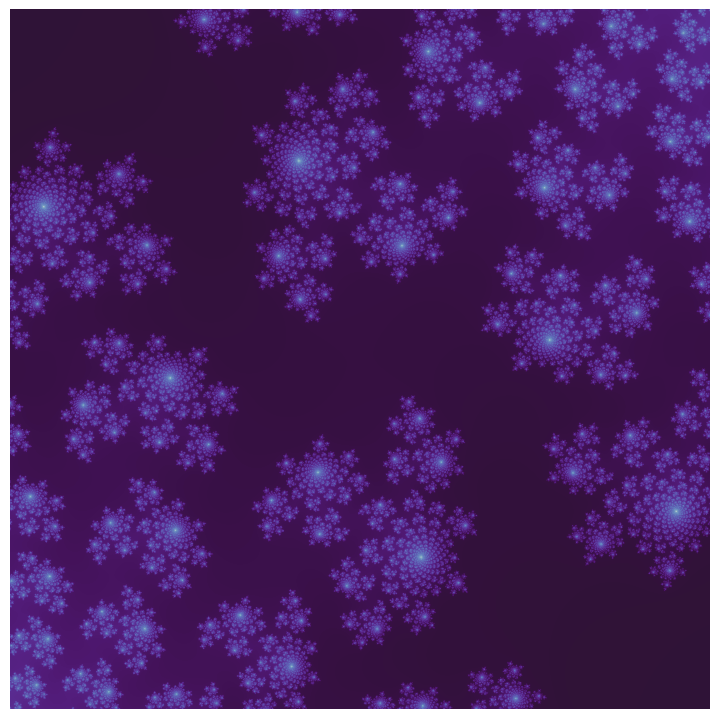

## \$ c = -0.50 + 0.6j \$
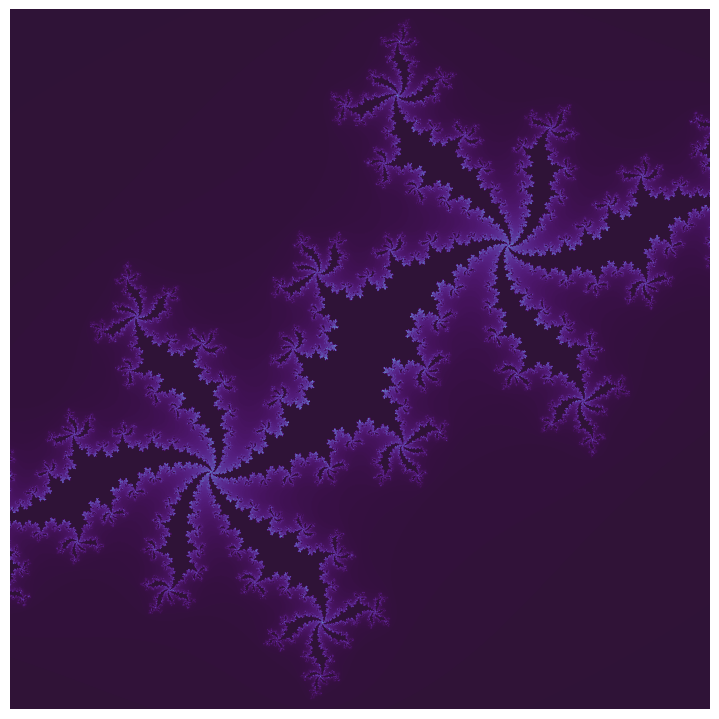

## What happens when we change the imaginary component? 

## \$ c = -0.40 + 0.62j \$
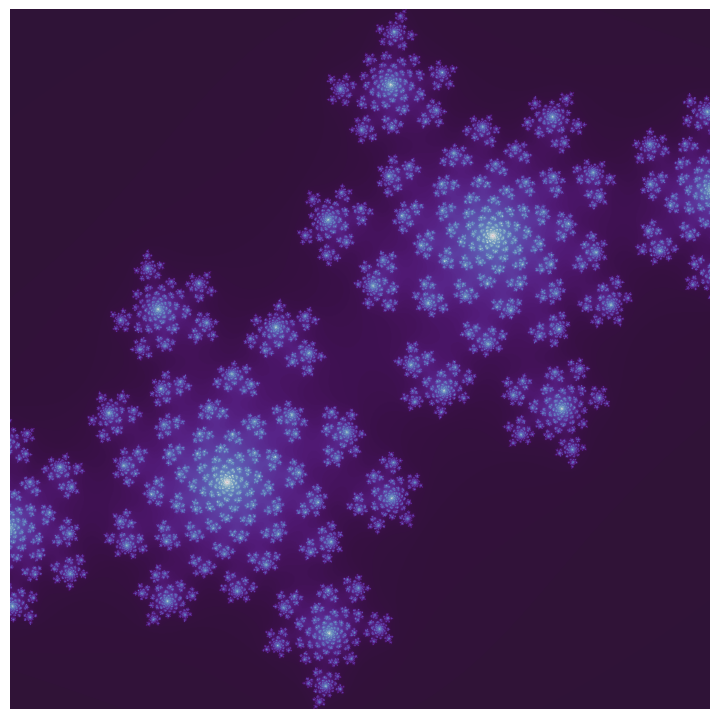

## \$ c = -0.40 + 0.59j \$
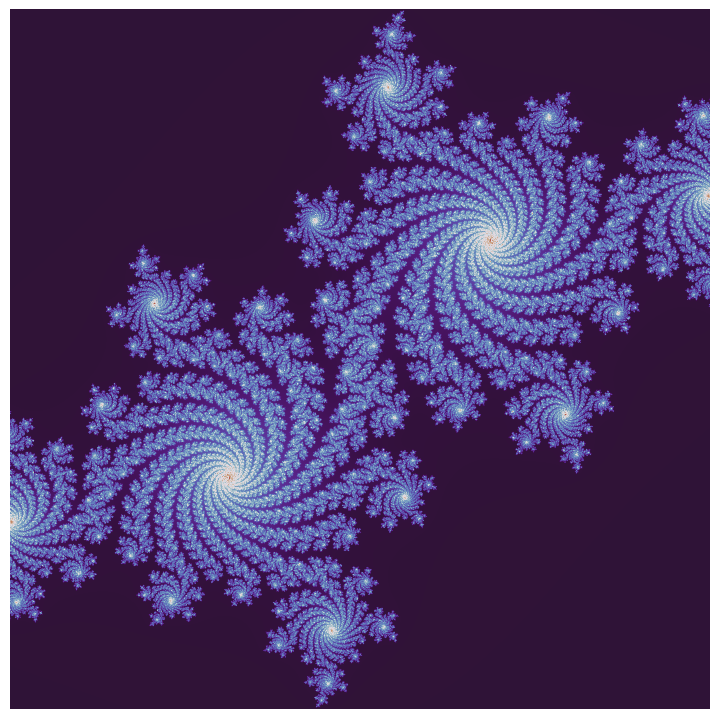

## What happens when we change iterations?

## 50 iterations
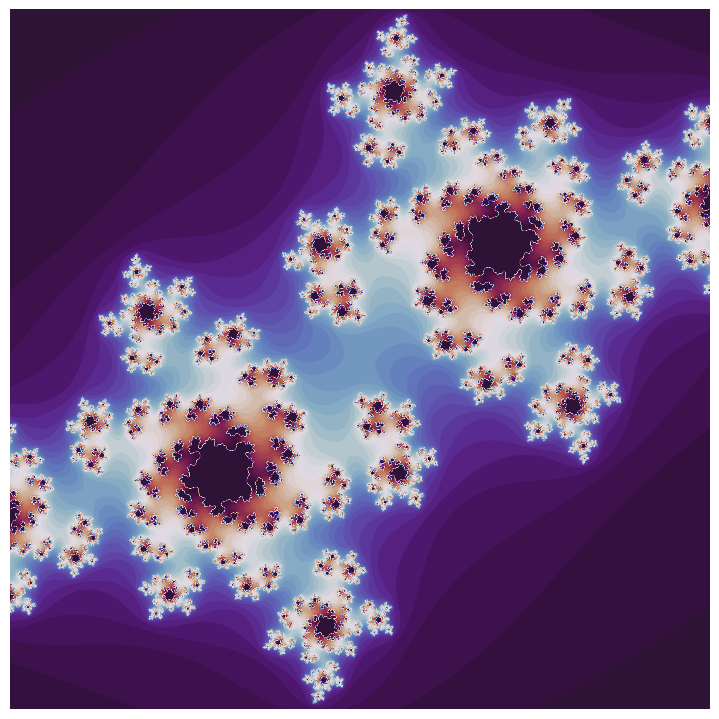

## 2000 iterations
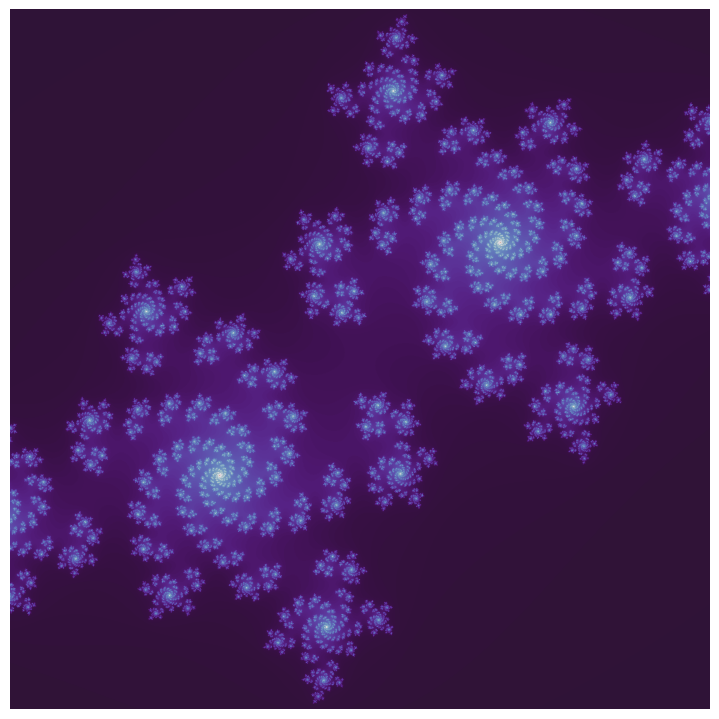

## Making an Animation

In [99]:
# Function to update the figure for animation
def update(frame, c_start = -0.39 + 0.6j, c_end = -0.33 + 0.6j ):
    global ax
    t = frame / num_frames
    c = (1 - t) * c_start + t * c_end  # Interpolating between c_start and c_end
    julia = julia_set(width, height, x_min, x_max, y_min, y_max, c, max_iter)
    ax.clear()  # Clear the previous image
    ax.imshow(julia, extent=[x_min, x_max, y_min, y_max], cmap='twilight_shifted', aspect='auto')
    ax.axis('off')  # Keep the axis off

In [ ]:
num_frames = 100
# Creating the animation
ani = FuncAnimation(fig, update, frames=np.linspace(0, num_frames, num_frames), interval=80)

# To display the animation
HTML(ani.to_html5_video())

#To animate the Julia Sets, we interpolate the value of 𝑐 over a series of frames. 
# This creates a dynamic visualization showing how the Julia Sets evolve.

In [130]:
from IPython.display import Video

Video("video1.mp4")

# Sources
[Matplotlib documentation](https://matplotlib.org/2.0.2/contents.html)   
[Julia Sets Information](https://en.wikipedia.org/wiki/Julia_set)   
[Julia Sets Video 1](https://www.youtube.com/watch?v=dctJ7ISkU-4)   
[Julia Sets Video 2](https://www.youtube.com/watch?v=Cnd_cVdwkk0)


